# Optimized Multi-modal-Emotion-Analysis-on-COVID-19-Code for Nature model

## 1. Getting Data Ready


In [1]:
# importing libraries
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
import re
import nltk
from nltk import word_tokenize
from nltk import StanfordTagger
import string
import matplotlib.pyplot as plt
import numpy as np


# 2. Getting NRC Dataframe Ready!

In [2]:
import pandas as pd
filepath = "NRC-emotion-lexicon-wordlevel-alphabetized-v0.92.txt"
emolex_df = pd.read_csv(filepath,  names=["word", "emotion", "association"], sep='\t')
emolex_df= emolex_df[emolex_df['association']==1]


In [3]:
emolex_df[(emolex_df.association == 1) & (emolex_df.emotion == 'anger')].word

51          abandoned
61        abandonment
191             abhor
201         abhorrent
291           abolish
             ...     
141241       wrongful
141251        wrongly
141491           yell
141521           yelp
141661          youth
Name: word, Length: 1247, dtype: object

In [4]:
emolex_words = emolex_df.pivot(index='word', columns='emotion', values='association').reset_index()


In [5]:
emotions = ['anger','anticipation','disgust','fear','joy','sadness','surprise','trust']
for i in emotions:
    emolex_words[i].fillna(0,inplace=True)

In [6]:
# NRC Dataframe Ready
emolex_words

emotion,word,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust
0,abacus,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,1.0
1,abandon,0.0,0.0,0.0,1.0,0.0,1.0,NaN,1.0,0.0,0.0
2,abandoned,1.0,0.0,0.0,1.0,0.0,1.0,NaN,1.0,0.0,0.0
3,abandonment,1.0,0.0,0.0,1.0,0.0,1.0,NaN,1.0,1.0,0.0
4,abba,0.0,0.0,0.0,0.0,0.0,NaN,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
6463,zany,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,1.0,0.0
6464,zeal,0.0,1.0,0.0,0.0,1.0,NaN,1.0,0.0,1.0,1.0
6465,zealous,0.0,0.0,0.0,0.0,1.0,NaN,1.0,0.0,0.0,1.0
6466,zest,0.0,1.0,0.0,0.0,1.0,NaN,1.0,0.0,0.0,1.0


In [7]:
emotion_anger = list(emolex_words['anger'])
emotion_anticipation = list(emolex_words['anticipation'])
emotion_disgust = list(emolex_words['disgust'])
emotion_fear = list(emolex_words['fear'])
emotion_joy = list(emolex_words['joy'])
emotion_negative = list(emolex_words['negative'])
emotion_positive = list(emolex_words['positive'])
emotion_sadness = list(emolex_words['sadness'])
emotion_surprise = list(emolex_words['surprise'])
emotion_trust = list(emolex_words['trust'])


In [8]:
emotion_word = list(emolex_words['word'])

In [9]:
emotion_word[:]

['abacus',
 'abandon',
 'abandoned',
 'abandonment',
 'abba',
 'abbot',
 'abduction',
 'aberrant',
 'aberration',
 'abhor',
 'abhorrent',
 'ability',
 'abject',
 'abnormal',
 'abolish',
 'abolition',
 'abominable',
 'abomination',
 'abort',
 'abortion',
 'abortive',
 'abovementioned',
 'abrasion',
 'abrogate',
 'abrupt',
 'abscess',
 'absence',
 'absent',
 'absentee',
 'absenteeism',
 'absolute',
 'absolution',
 'absorbed',
 'absurd',
 'absurdity',
 'abundance',
 'abundant',
 'abuse',
 'abysmal',
 'abyss',
 'academic',
 'academy',
 'accelerate',
 'acceptable',
 'acceptance',
 'accessible',
 'accident',
 'accidental',
 'accidentally',
 'accolade',
 'accommodation',
 'accompaniment',
 'accomplish',
 'accomplished',
 'accomplishment',
 'accord',
 'account',
 'accountability',
 'accountable',
 'accountant',
 'accounts',
 'accredited',
 'accueil',
 'accurate',
 'accursed',
 'accusation',
 'accusative',
 'accused',
 'accuser',
 'accusing',
 'ace',
 'ache',
 'achieve',
 'achievement',
 'achin

## Number of tweets in each category

### nature = 37361, 
### education = 31560, 
### health = 184683, 
### lockdown = 113033, 
### market = 89110, 
### politics = 120620, 
### other = 392040

[13402, 42978, 23543, 17987, 42122, 18035, 27108, 53919]


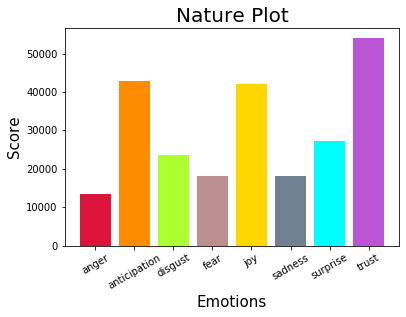

In [10]:
def pos_taggers(name):
    df = pd.read_csv(name + ".csv",encoding='latin1')
    
    

    req_col = df['Tweet Content'].tolist()
    
 
    pos_words= []

    for i in range(0,len(df['Tweet Content'])):
        text_tok = nltk.word_tokenize(req_col[i])
#print(text_tok)
        pos_tagged = nltk.pos_tag(text_tok)
#print the list of tuples: (word,word_class)
#print(pos_tagged)
 
# for loop to extract the elements of the tuples in the pos_tagged list
# print the word and the pos_tag with the underscore as a delimiter
        for word,word_class in pos_tagged:
            if (word_class == 'JJ'or word_class == 'JJR' or word_class == 'RB' or word_class == 'RBR' or word_class == 'RBS'):
                pos_words.append(word)
            #print(word + "_" + word_class)
    common_words_category = list(set(emotion_word).intersection(set(pos_words)))
    
    # Create your dictionary class  
    class my_dictionary(dict):  
  
    # __init__ function  
        def __init__(self):  
            self = dict()  
          
    # Function to add key:value  
        def add(self, key, value):  
            self[key] = value  
    def CountFrequency(my_list):
        dict_obj = my_dictionary() 
        for i in my_list:
            j = pos_words.count(i)
            # Taking input key = 1, value = Geek 
            dict_obj.key = i
            dict_obj.value = j
            dict_obj.add(dict_obj.key, dict_obj.value) 
        return dict_obj

    dictionary_category = CountFrequency(common_words_category)

    anger_category=0
    anticipation_category=0
    disgust_category=0
    fear_category=0
    joy_category=0
    negative_category=0
    positive_category=0
    sadness_category=0
    surprise_category=0
    trust_category=0
    
    for row in emolex_words.itertuples():
        for key,value in dictionary_category.items():
            if row[1] in key:
               
                if (row.anger == 1):
                    anger_category += value
                if (row.anticipation == 1):
                    anticipation_category += value
                if (row.disgust == 1):
                    disgust_category += value
                if (row.fear == 1):
                    fear_category += value
                if (row.joy == 1):
                    joy_category +=value
                if (row.negative == 1):
                    negative_category += value
                if (row.positive == 1):
                    positive_category += value
                if (row.sadness == 1):
                    sadness_category += value
                if (row.surprise == 1):
                    surprise_category += value
                if (row.trust == 1):
                    trust_category += value
    
    
    label = emotions
    no_of_tweets = [anger_category,anticipation_category,disgust_category,fear_category,joy_category,sadness_category,surprise_category,trust_category]
    print(no_of_tweets)
    def plot_bar_x():
        # this is for plotting purpose
        index = np.arange(len(label))
        plt.bar(index, no_of_tweets ,color = ['crimson','darkorange','greenyellow','rosybrown','gold','slategrey','cyan','mediumorchid'])
        plt.xlabel('Emotions', fontsize=15)
        plt.ylabel('Score', fontsize=15)
        plt.xticks(index, label, fontsize=10, rotation=30)
        plt.title('Nature Plot',fontsize=20)
        plt.savefig('nature Plot.jpg',bbox_inches = 'tight')
    plot_bar_x()


pos_taggers('nature')